In [ ]:
import tensorflow as tf 
from tensorflow import keras

In [ ]:
conv_1 = keras.layers.Conv2D(filters=10,kernel_size=3,strides=1, padding="same",input_shape=(32,32,3))

In [ ]:
# model
model = keras.Sequential([
    conv_1
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 10)        280       
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# params 
# (channel 3 x filter 3 x 3 + bias) x filter number 10 = 280

In [ ]:
# output shape
# (input 32 - filter 3 + 2*padding 1) / stride 1 + 1 = 32
# same으로 할 경우 same으로 나올 수 있도록 padding 값 조절 

In [ ]:
conv_2 = keras.layers.Conv2D(filters=10,kernel_size=3,strides=1, padding="valid")

In [ ]:
model_2 = keras.Sequential([
    conv_1,
    conv_2
])

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 10)        280       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 10)        910       
Total params: 1,190
Trainable params: 1,190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# pooling 추가
max_pooling = keras.layers.MaxPooling2D()

In [ ]:
model_3 = keras.Sequential([
        conv_1,
        max_pooling,
        conv_2,

])

In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 10)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  910       
Total params: 1,190
Trainable params: 1,190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# FCL
flatten = keras.layers.Flatten()
dense_1 = keras.layers.Dense(32, activation="relu")
dense_2 = keras.layers.Dense(10, activation="softmax")

In [ ]:
model_4 = keras.Sequential([
        conv_1,
        max_pooling,
        conv_2,
        max_pooling,
        flatten,
        dense_1,
        dense_2
])

In [ ]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 10)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  910       
_________________________________________________________________
flatten (Flatten)            (None, 490)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                15712     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 17,232
Trainable params: 17,232
Non-trainable params: 0
__________________________________________________

In [ ]:
# mnist 손글씨 인식하는 CNN 모델을 만들어 볼까요?

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras

In [ ]:
# mnist data 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

In [ ]:
# (개수, 가로, 세로, 채널)
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:, np.newaxis]

In [ ]:
model = keras.Sequential([
     keras.layers.Conv2D(32, 3, 1, padding="same" ,input_shape=(28,28,1), activation="relu"),
     keras.layers.Conv2D(64, 3, 1, padding="same" ,activation="relu"),
     keras.layers.MaxPool2D(),
     keras.layers.Flatten(),
     keras.layers.Dense(64, activation="relu"),
     keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="./mnist_model.h5",
    save_best_only=True
)

In [ ]:
model.fit(x_train,y_train, batch_size=32, epochs=10, validation_split=0.2, callbacks=[model_checkpoint])

Epoch 1/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1392 - accuracy: 0.9578 - val_loss: 0.0570 - val_accuracy: 0.9807
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0443 - accuracy: 0.9864 - val_loss: 0.0446 - val_accuracy: 0.9869
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0519 - val_accuracy: 0.9846
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0493 - val_accuracy: 0.9853
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0438 - val_accuracy: 0.9883
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0571 - val_accuracy: 0.9868
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.0479 - val_a

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0483 - accuracy: 0.9901


In [ ]:
temp_image = tf.keras.preprocessing.image.random_rotation(
    x_train[0], 30
)

In [ ]:
temp_image = np.squeeze(temp_image)

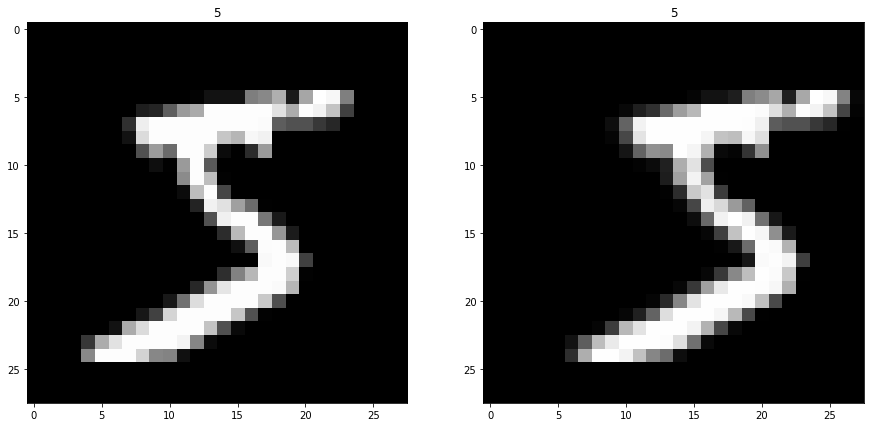

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(np.squeeze(x_train[0]), "gray")
plt.title(f"{y_train[0]}")

plt.subplot(1,2,2)
plt.imshow(temp_image, "gray")
plt.title(f"{y_train[0]}")
plt.show()

In [ ]:
pred = model.predict(temp_image[np.newaxis,:,:,np.newaxis])

In [ ]:
# CNN으로 MLP의 문제였던 지역, 공간 정보를 모델이 학습하지 못하는 문제를 해결
np.argmax(pred)

5